# Çoklu Doğrusal Regresyon

***Temel amaç, bağımlı ve bağımsız değişkenler arasıdaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.***

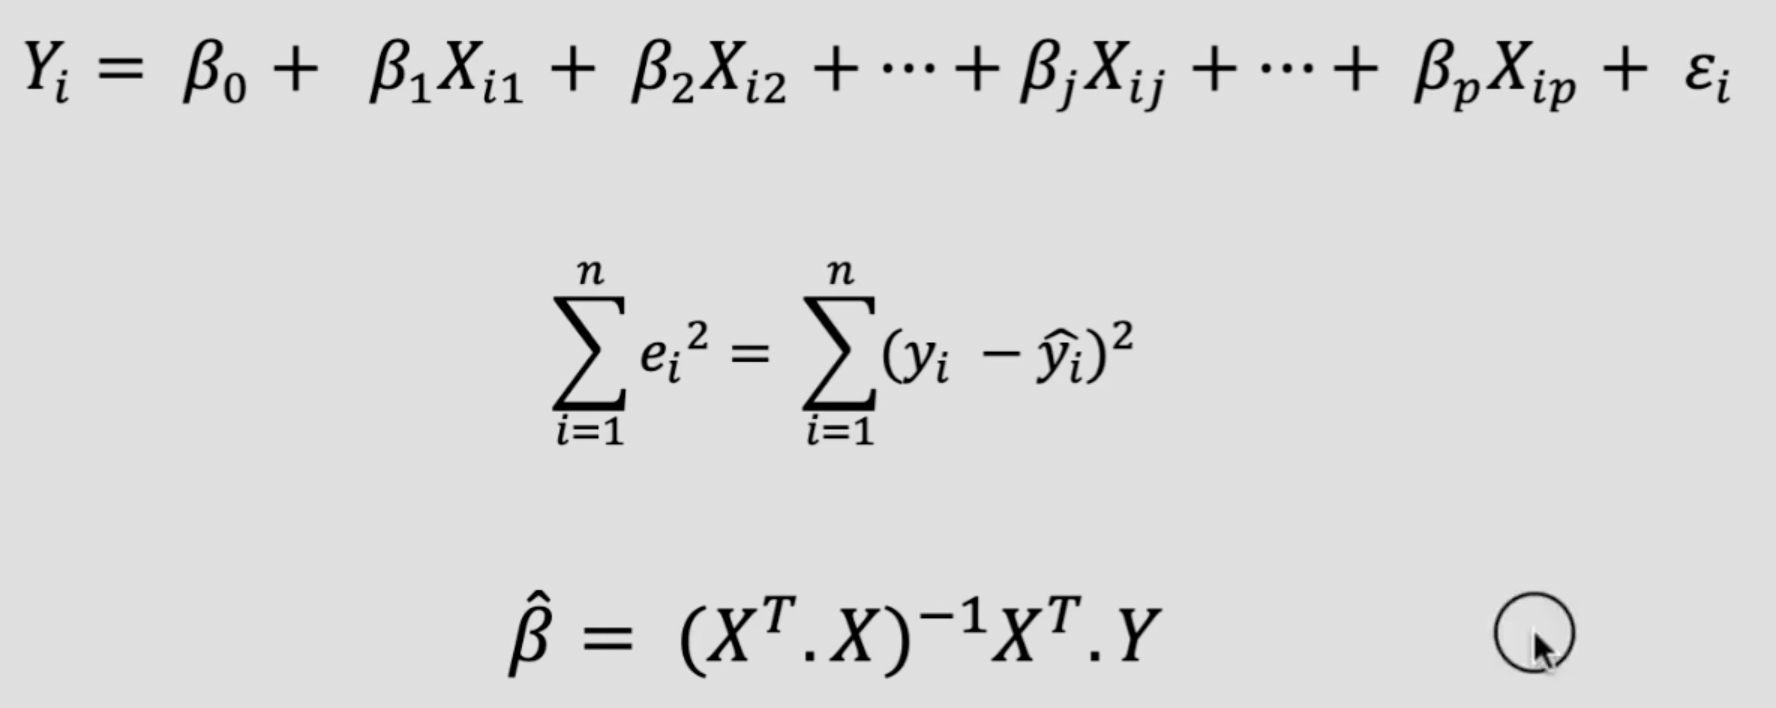

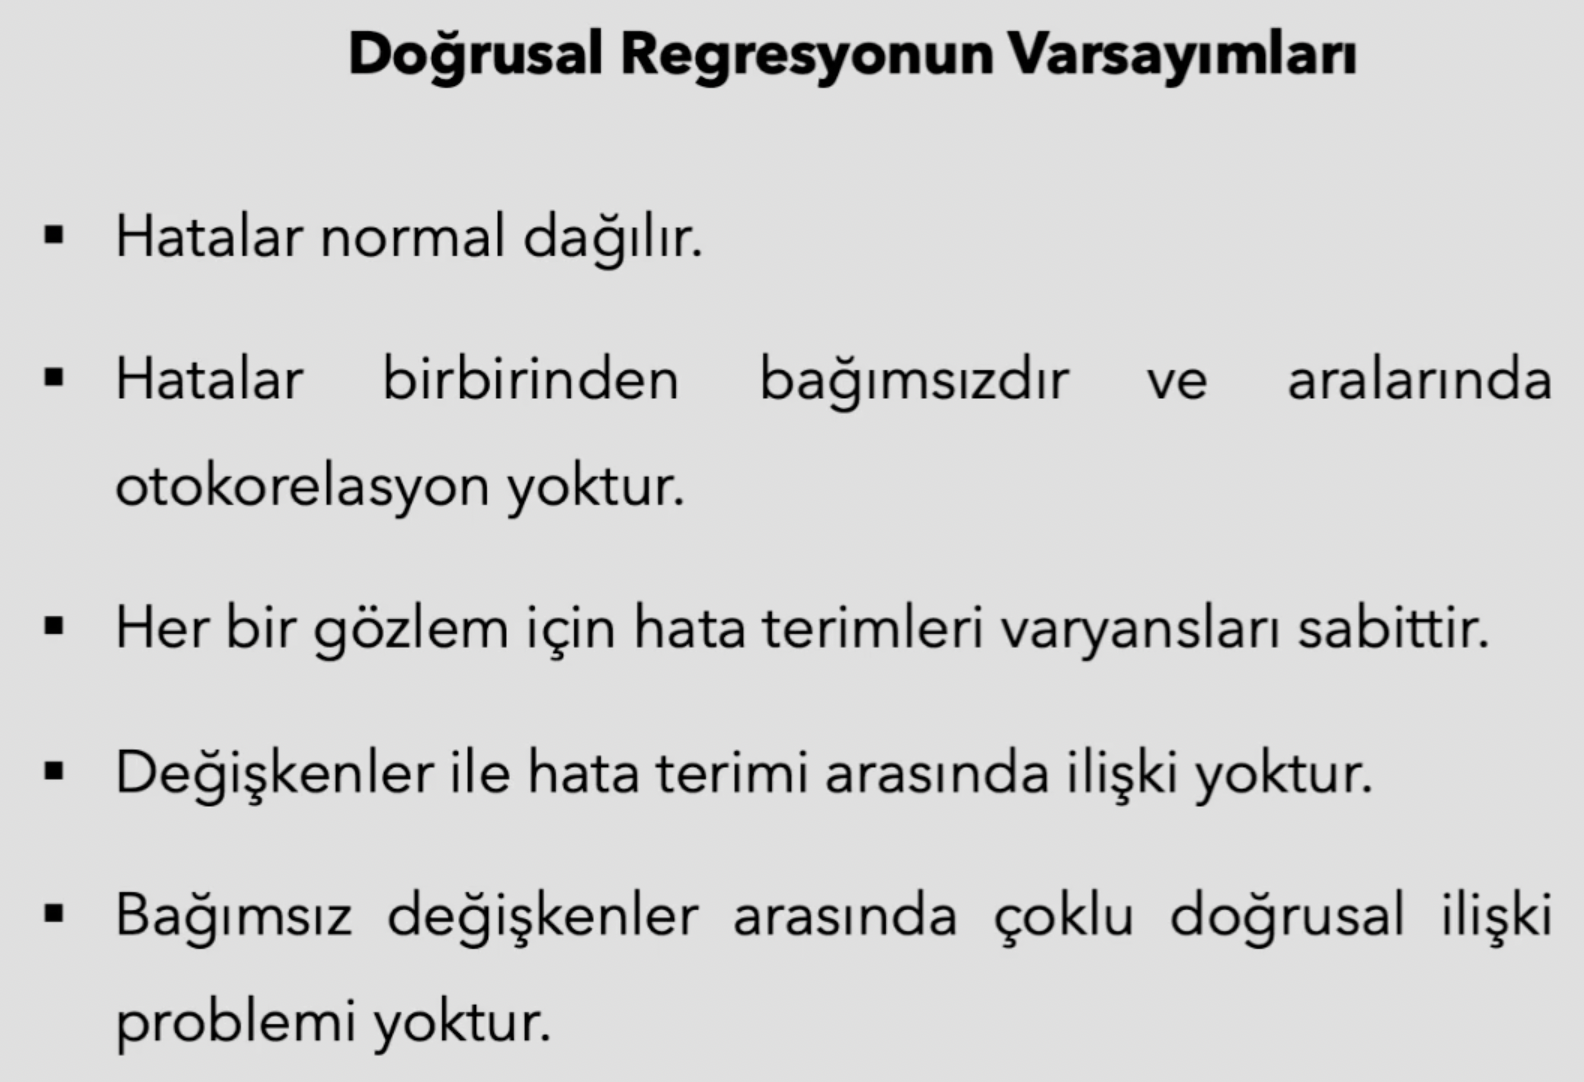

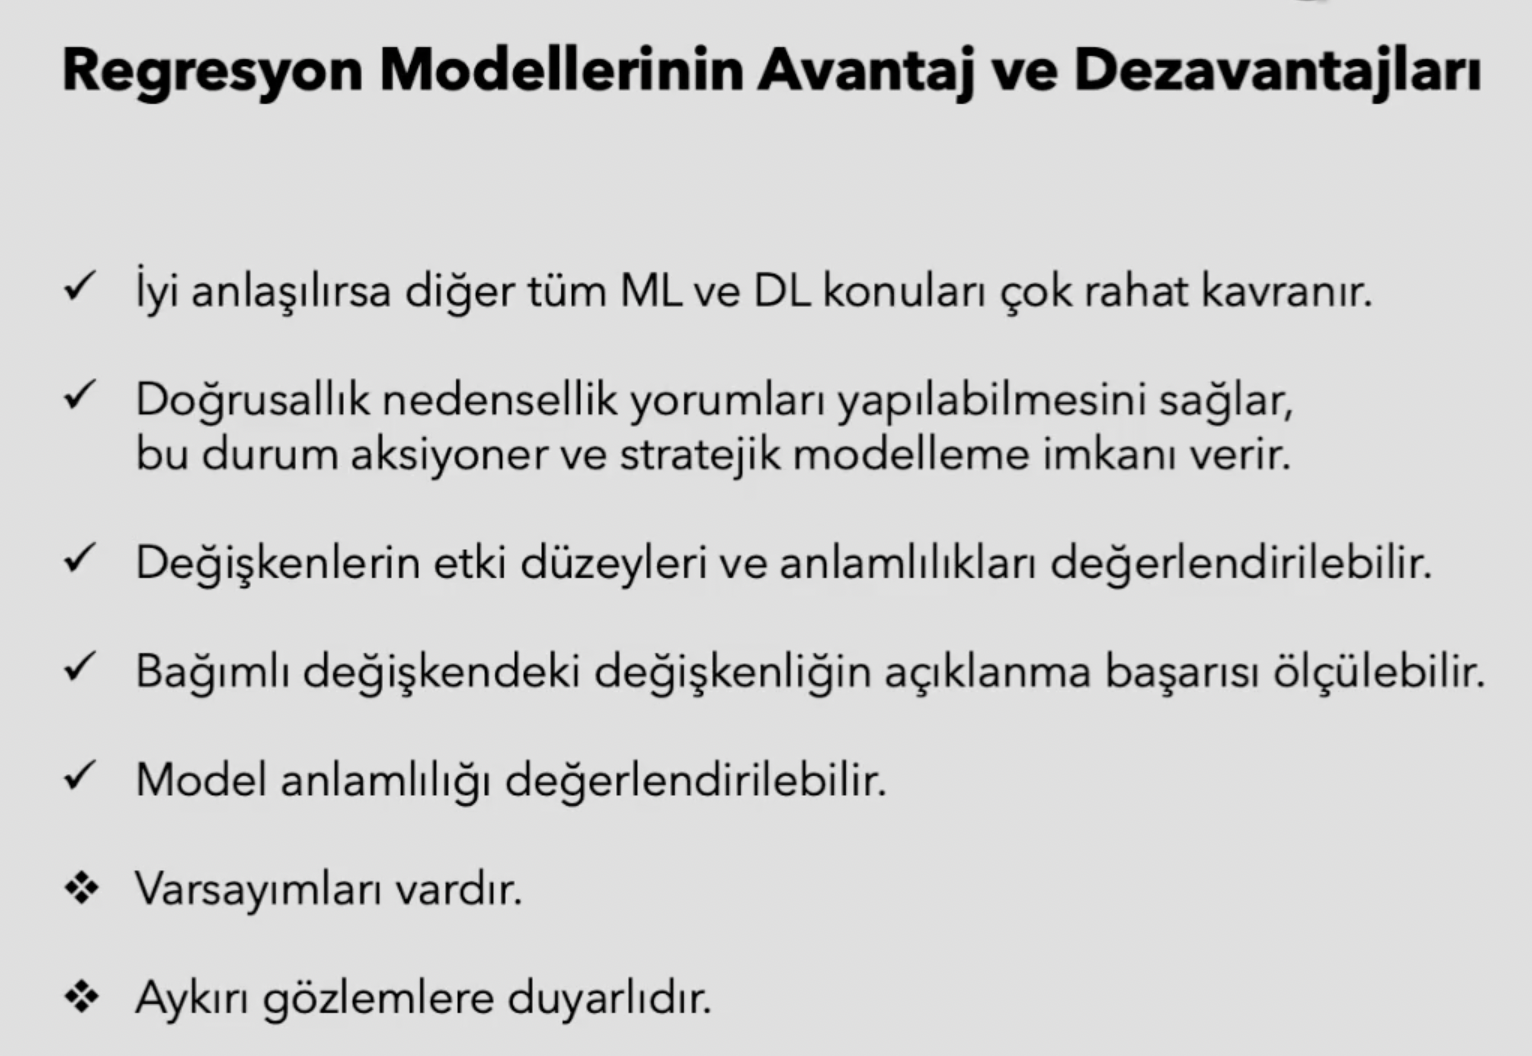

In [1]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop("sales",axis = 1)
y = df["sales"]
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [6]:
X[:10]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [10]:
X = df.drop("sales",axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [15]:
training = df.copy()

In [16]:
training.shape

(200, 4)

## Statsmodels

In [18]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)

In [19]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):                   1.28e-137
Time:                        01:26:44   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## Scikit-Learn Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [25]:
model.intercept_

2.979067338122629

In [26]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

# Tahmin

***Model denklemi:***

_Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002_

_Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?
​_

In [29]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [30]:
model.predict(yeni_veri)

array([6.32334798])

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [37]:
rmse

1.6447277656443373

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [39]:
rmse

1.7815996615334506

# Model Tuning / Model Doğrulama

In [40]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [50]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [51]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701038

In [65]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701038

In [52]:
model.score(X_train, y_train)

0.8971614078663419

In [55]:
cross_val_score(model, X_train , y_train, cv = 10, scoring = "r2").mean()

0.8733783298422939

In [64]:
np.sqrt(-cross_val_score(model,
                X_train, 
                y_train,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872932

In [66]:
np.sqrt(-cross_val_score(model,
                X_test, 
                y_test,
                cv = 10,
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346642